## Load Data

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import seaborn as sns

In [2]:
df = pd.read_csv('../../dataset/after_selection/train.csv')
df.head()

Driving_License  Region_Code  Previously_Insured  Vehicle_Age  \
0                1         46.0                   1            0   
1                1         46.0                   1            0   
2                1         46.0                   1            1   
3                1         18.0                   1            0   
4                1         11.0                   0            1   

   Vehicle_Damage  Policy_Sales_Channel  Age_Bin  \
0               0                 152.0        0   
1               0                 152.0        0   
2               1                  26.0        2   
3               0                 152.0        1   
4               1                 122.0        2   

   Vehicle_Damage_Age_Interaction  Response  
0                               0         0  
1                               0         0  
2                               2         0  
3                               0         0  
4                               2         0

## Modeling

In [3]:
# Inisialisasi Variabel X dan Y
X = df.drop(columns=['Response'])
y = df[['Response']]

In [4]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

### Evaluation Method

In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate, StratifiedKFold


def eval_classification(model, X_train, X_test, y_train, y_test, n_splits=5):
    # Evaluate on the test set
    y_pred_test = model.predict(X_test)

    # StratifiedKFold for cross-validation with stratified sampling
    cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

    # Perform cross-validation
    cv_test_results = cross_validate(model, X_test, y_test, scoring=['roc_auc'],
                                     cv=cv, return_train_score=False)
    cv_train_results = cross_validate(model, X_train, y_train, scoring=['roc_auc'],
                                      cv=cv, return_train_score=False)

    # Display metrics for the training set
    print("Metrics for the Test Set:")
    print("Accuracy: %.2f" % accuracy_score(y_test, y_pred_test))
    print("Precision: %.2f" % precision_score(y_test, y_pred_test))
    print("Recall: %.2f" % recall_score(y_test, y_pred_test))
    print("F1-Score: %.2f" % f1_score(y_test, y_pred_test))
    print()

    # Display cross-validation results
    print("Metrics Using Cross Validation:")
    print(f"Mean ROC_AUC (Test): {cv_test_results['test_roc_auc'].mean():.2f}")
    print(f"Std ROC_AUC (Test): {cv_test_results['test_roc_auc'].std():.2f}")
    print()
    print(f"Mean ROC_AUC (Train): {cv_train_results['test_roc_auc'].mean():.2f}")
    print(f"Std ROC_AUC (Train): {cv_train_results['test_roc_auc'].std():.2f}")

### AdaBoost

#### Base Model

In [8]:
clf = AdaBoostClassifier()
clf.fit(X_train, y_train)
eval_classification(clf, X_train, X_test, y_train, y_test)

c:\Users\Ujang Pian\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


c:\Users\Ujang Pian\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Ujang Pian\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Ujang Pian\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Ujang Pian\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\valid

Metrics for the Test Set:
Accuracy: 0.80
Precision: 0.72
Recall: 0.95
F1-Score: 0.82

Metrics Using Cross Validation:
Mean ROC_AUC (Test): 0.84
Std ROC_AUC (Test): 0.01

Mean ROC_AUC (Train): 0.85
Std ROC_AUC (Train): 0.00


#### Hyperparameter Tunning

### Tunning 1

In [11]:
#hyperparameter menggunakan metode gridsearchcv
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np

hyperparameters_1 = dict(n_estimators=[int(x) for x in np.linspace(start=90, stop=100, num=5)],
                       learning_rate=[float(x) for x in np.linspace(
                           start=0.01, stop=0.1, num=5)],
                       algorithm=['SAMME', 'SAMME.R']
                       )

ab = AdaBoostClassifier()
ab_tuned = GridSearchCV(ab, hyperparameters_1, cv=5, scoring='precision')
ab_tuned.fit(X_train,y_train)

print(f'Best Hyperparameters: {ab_tuned.best_params_}')

# Predict & Evaluation
eval_classification(ab_tuned, X_train, X_test, y_train, y_test)

c:\Users\Ujang Pian\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Ujang Pian\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Ujang Pian\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Ujang Pian\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\valid

Best Hyperparameters: {'algorithm': 'SAMME.R', 'learning_rate': 0.1, 'n_estimators': 100}


c:\Users\Ujang Pian\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Ujang Pian\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Ujang Pian\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Ujang Pian\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\valid

Metrics for the Test Set:
Accuracy: 0.79
Precision: 0.71
Recall: 0.97
F1-Score: 0.82

Metrics Using Cross Validation:
Mean ROC_AUC (Test): 0.83
Std ROC_AUC (Test): 0.01

Mean ROC_AUC (Train): 0.84
Std ROC_AUC (Train): 0.00


### Tunning 2

In [12]:
#hyperparameter menggunakan metode gridsearchcv
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np

hyperparameters_2 = dict(n_estimators=[int(x) for x in np.linspace(start=80, stop=90, num=5)],
                       learning_rate=[float(x) for x in np.linspace(
                           start=0.01, stop=0.1, num=7)],
                       algorithm=['SAMME', 'SAMME.R']
                       )

ab = AdaBoostClassifier()
ab_tuned1 = GridSearchCV(ab, hyperparameters_2, cv=3, scoring='precision')
ab_tuned1.fit(X_train,y_train)

print(f'Best Hyperparameters: {ab_tuned1.best_params_}')

# Predict & Evaluation
eval_classification(ab_tuned1, X_train, X_test, y_train, y_test)

c:\Users\Ujang Pian\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Ujang Pian\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Ujang Pian\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Ujang Pian\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\valid

Best Hyperparameters: {'algorithm': 'SAMME.R', 'learning_rate': 0.085, 'n_estimators': 87}


c:\Users\Ujang Pian\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Ujang Pian\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Ujang Pian\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Ujang Pian\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\valid

Metrics for the Test Set:
Accuracy: 0.79
Precision: 0.71
Recall: 0.97
F1-Score: 0.82

Metrics Using Cross Validation:
Mean ROC_AUC (Test): 0.83
Std ROC_AUC (Test): 0.01

Mean ROC_AUC (Train): 0.84
Std ROC_AUC (Train): 0.00


### Tunning 3

In [13]:
#hyperparameter menggunakan metode gridsearchcv
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np

hyperparameters_3 = dict(n_estimators=[int(x) for x in np.linspace(start=1, stop=20, num=10)],
                       learning_rate=[float(x) for x in np.linspace(
                           start=0.01, stop=0.1, num=10)],
                       algorithm=['SAMME', 'SAMME.R']
                       )

ab = AdaBoostClassifier()
ab_tuned2 = GridSearchCV(ab, hyperparameters_3, cv=5, scoring='precision')
ab_tuned2.fit(X_train,y_train)

print(f'Best Hyperparameters: {ab_tuned2.best_params_}')

# Predict & Evaluation
eval_classification(ab_tuned2, X_train, X_test, y_train, y_test)

c:\Users\Ujang Pian\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Ujang Pian\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Ujang Pian\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Ujang Pian\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\valid

Best Hyperparameters: {'algorithm': 'SAMME', 'learning_rate': 0.1, 'n_estimators': 20}


c:\Users\Ujang Pian\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Ujang Pian\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Ujang Pian\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Ujang Pian\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\valid

Metrics for the Test Set:
Accuracy: 0.78
Precision: 0.70
Recall: 0.98
F1-Score: 0.82

Metrics Using Cross Validation:
Mean ROC_AUC (Test): 0.82
Std ROC_AUC (Test): 0.01

Mean ROC_AUC (Train): 0.81
Std ROC_AUC (Train): 0.01


### Tunning 4

In [14]:
#hyperparameter menggunakan metode gridsearchcv
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np

hyperparameters_4 = dict(n_estimators=[int(x) for x in np.linspace(start=1, stop=60, num=30)],
                       learning_rate=[float(x) for x in np.linspace(
                           start=0.01, stop=0.1, num=30)],
                       algorithm=['SAMME', 'SAMME.R']
                       )

ab = AdaBoostClassifier()
ab_tuned3 = GridSearchCV(ab, hyperparameters_3, cv=5, scoring='precision')
ab_tuned3.fit(X_train,y_train)

print(f'Best Hyperparameters: {ab_tuned3.best_params_}')

# Predict & Evaluation
eval_classification(ab_tuned3, X_train, X_test, y_train, y_test)

c:\Users\Ujang Pian\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Ujang Pian\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Ujang Pian\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Ujang Pian\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\valid

Best Hyperparameters: {'algorithm': 'SAMME', 'learning_rate': 0.1, 'n_estimators': 20}


c:\Users\Ujang Pian\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Ujang Pian\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Ujang Pian\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Ujang Pian\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\valid

Metrics for the Test Set:
Accuracy: 0.78
Precision: 0.70
Recall: 0.98
F1-Score: 0.82

Metrics Using Cross Validation:
Mean ROC_AUC (Test): 0.82
Std ROC_AUC (Test): 0.01

Mean ROC_AUC (Train): 0.81
Std ROC_AUC (Train): 0.01


## Feature Importance

### Visualization

In [ ]:
def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

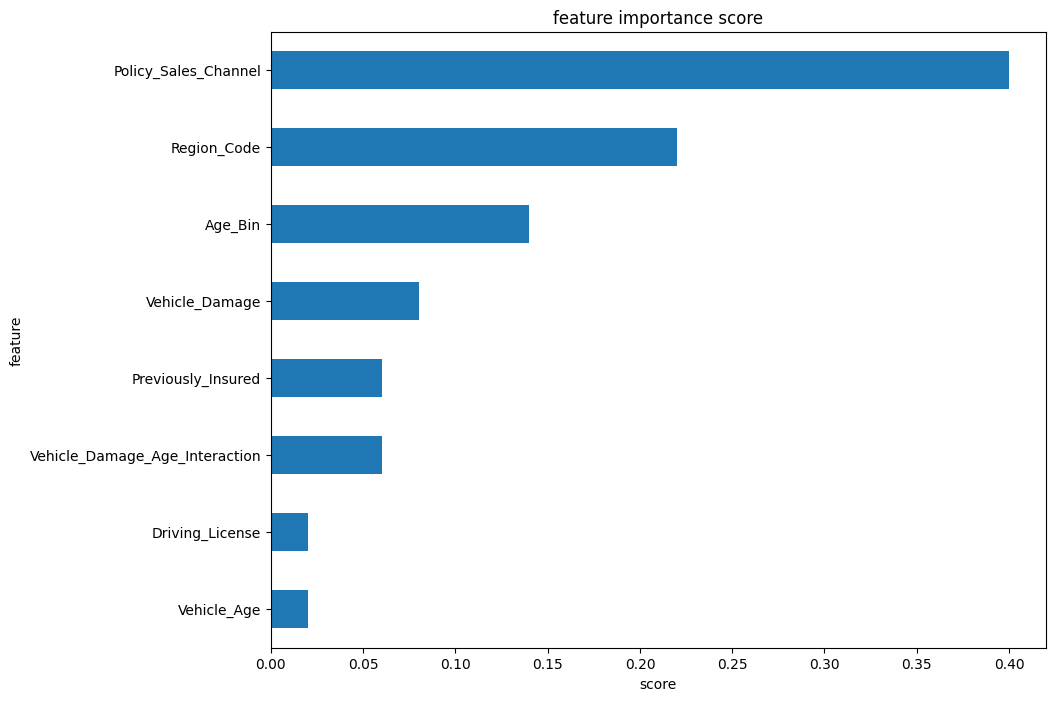

In [ ]:
show_feature_importance(clf)

### Business Insight

1. Policy Sales Channel:

- Business Insight: Policy sales channel memiliki dampak besar terhadap hasil model, menunjukkan bahwa jalur penjualan tertentu memiliki pengaruh signifikan terhadap respons pelanggan terhadap penawaran asuransi kendaraan.
- Rekomendasi: Perlu dilakukan analisis lebih lanjut untuk memahami karakteristik dan preferensi pelanggan yang menggunakan saluran penjualan tertentu. Upaya pemasaran dapat difokuskan pada peningkatan efektivitas saluran penjualan yang memberikan hasil positif.

2. Region Code:

- Business Insight: Region code juga memiliki pengaruh yang signifikan pada model, menunjukkan bahwa lokasi geografis memainkan peran penting dalam respons pelanggan.
- Rekomendasi: Analisis lebih lanjut mengenai karakteristik dan preferensi pelanggan di berbagai wilayah dapat membantu mengarahkan strategi pemasaran yang lebih lokal dan disesuaikan.

3. Age Bin:

- Business Insight: Kategori usia (Age Bin) memengaruhi hasil model, menunjukkan bahwa segmentasi usia dapat menjadi faktor kunci dalam menentukan respons pelanggan.
- Rekomendasi: Pemahaman lebih lanjut tentang preferensi dan kebutuhan asuransi kendaraan berdasarkan kategori usia dapat membimbing pengembangan produk yang lebih sesuai dan strategi pemasaran yang lebih efektif.

4. Vehicle Damage:

- Business Insight: Kondisi kerusakan kendaraan (Vehicle Damage) memiliki dampak besar pada respons pelanggan, menunjukkan bahwa pelanggan yang kendaraannya telah rusak mungkin lebih cenderung tertarik pada penawaran asuransi.
- Rekomendasi: Fokus pemasaran dapat ditempatkan pada segmen pelanggan yang belum memiliki asuransi dan telah mengalami kerusakan kendaraan sebelumnya.

5. Previously Insured:

- Business Insight: Status asuransi sebelumnya (Previously Insured) juga merupakan faktor kunci dalam respons pelanggan, menandakan bahwa pelanggan yang belum diasuransikan sebelumnya cenderung merespons lebih positif.
- Rekomendasi: Strategi pemasaran dapat lebih difokuskan pada pelanggan yang belum memiliki asuransi sebelumnya, dengan menekankan manfaat dan nilai tambah dari produk asuransi kendaraan.

## Model Comparison

Masing-masing code model tersedia pada folder code_model. Berikut adalah hasil akhir masing-masing model yang terbaik

In [ ]:
# Data for the models
data = {
    'Model': ['LightGBM', 'CatBoost', 'K nearest neighbors', 'Random Forest', 'AdaBoost', 'XGBoost'],
    'Accuracy': [0.80, 0.80, 0.80, 0.80, 0.80, 0.80],
    'Precision': [0.73, 0.73, 0.73, 0.73, 0.73, 0.73],
    'Recall': [0.94, 0.93, 0.94, 0.93, 0.95, 0.94],
    'F1-Score': [0.82, 0.82, 0.82, 0.82, 0.82, 0.82],
    'Mean ROC-AUC (Test)': [0.84, 0.84, 0.64, 0.84, 0.84, 0.84],
    'Std ROC-AUC (Test)': [0.01, 0.01, 0.00, 0.01, 0.00, 0.01],
    'Mean ROC-AUC (Train)': [0.85, 0.85, 0.65, 0.85, 0.85, 0.85],
    'Std ROC-AUC (Train)': [0.00, 0.00, 0.00, 0.00, 0.00, 0.00]
}

# Create DataFrame
df = pd.DataFrame(data)
df = df.sort_values(by=['Recall', 'Mean ROC-AUC (Test)', 'Std ROC-AUC (Test)'], ascending=False).reset_index(drop=True)

# Display DataFrame
df

Model  Accuracy  Precision  Recall  F1-Score  \
0             AdaBoost       0.8       0.73    0.95      0.82   
1             LightGBM       0.8       0.73    0.94      0.82   
2              XGBoost       0.8       0.73    0.94      0.82   
3  K nearest neighbors       0.8       0.73    0.94      0.82   
4             CatBoost       0.8       0.73    0.93      0.82   
5        Random Forest       0.8       0.73    0.93      0.82   

   Mean ROC-AUC (Test)  Std ROC-AUC (Test)  Mean ROC-AUC (Train)  \
0                 0.84                0.00                  0.85   
1                 0.84                0.01                  0.85   
2                 0.84                0.01                  0.85   
3                 0.64                0.00                  0.65   
4                 0.84                0.01                  0.85   
5                 0.84                0.01                  0.85   

   Std ROC-AUC (Train)  
0                  0.0  
1                  0.0  
2                  0.0  
3                  0.0  
4                  0.0  
5                  0.0

Hasil eksperimen kami menunjukkan bahwa dari beberapa algoritma yang diuji, fokus pada metrik Recall, Adaboosting menghasilkan nilai Recall terbesar. Oleh karena itu, model yang dipilih untuk implementasi adalah menggunakan Adaboosting. Pemilihan ini didasarkan pada keinginan untuk memaksimalkan Recall, khususnya dalam mengidentifikasi pelanggan yang sebenarnya tertarik, dengan menghindari False Negatives. Keputusan ini diharapkan dapat memberikan keunggulan dalam konteks penawaran Asuransi Kendaraan, dengan meningkatkan kemampuan model untuk mengenali dengan akurat pelanggan yang berpotensi tertarik. Tetap diingat untuk terus memantau dan memelihara model untuk memastikan kinerjanya tetap optimal dan sesuai dengan kebutuhan bisnis yang berkembang.